In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Экспортируем тестовые данные и задаем названия колонкам

In [27]:
data = pd.read_csv('seeds_dataset.txt', sep="	", names=["area A", "perimeter P", "compactness C = 4*pi*A/P^2", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove","cultivar"])
data.head() 

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cultivar
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Описываем данные

In [28]:
data.describe()

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cultivar
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


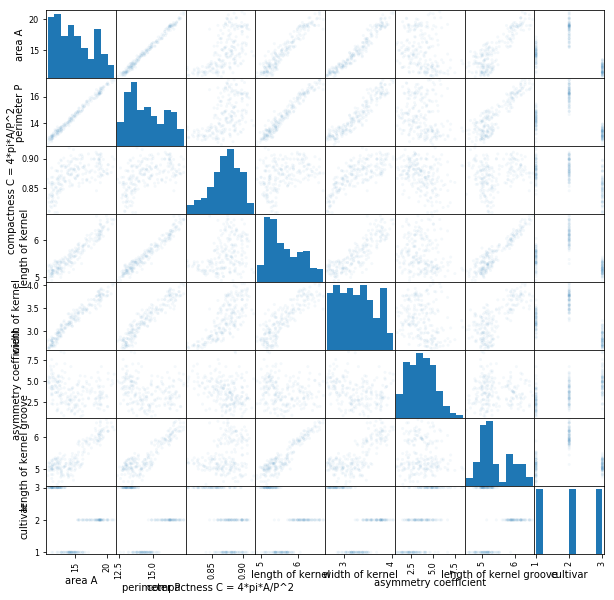

In [29]:
data.corr()
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

т.к. NAN значения и категориальные признаки отсутствуют, преобразования не нужны

In [30]:
print(data.isnull().values.sum()) # number of NaN-values in the dataset
len([c for c in data.columns if data[c].dtype.name == 'object']) # categorical_columns
len([c for c in data.columns if data[c].dtype.name != 'object']) # numerical_columns

0


8

Отделяем столбец, значение которого будем предсказывать, остальные данные нормируем, т.к. того требует knn

In [31]:
x = data.drop(('cultivar'), axis = 1) 
y = data['cultivar']
x = (x - x.mean(axis = 0))/x.std(axis = 0)
x.describe()

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-2.254281e-15,-2.566730e-15,1.402780e-15,-4.132144e-15,-2.622241e-16,3.827626e-16,-1.691768e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.463218e+00,-1.645753e+00,-2.661876e+00,-1.646566e+00,-1.664233e+00,-1.952105e+00,-1.808966e+00
25%,-8.858385e-01,-8.494033e-01,-5.966534e-01,-8.267062e-01,-8.329169e-01,-7.573380e-01,-7.387301e-01
50%,-1.692697e-01,-1.832261e-01,1.037448e-01,-2.370616e-01,-5.719866e-02,-6.730769e-02,-3.765590e-01
75%,8.445808e-01,8.849547e-01,7.099807e-01,7.927006e-01,8.025778e-01,7.106807e-01,9.541143e-01
max,2.176333e+00,2.060336e+00,2.001803e+00,2.361889e+00,2.050213e+00,3.163032e+00,2.323446e+00


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # выделяем 33 процента в тестовую выборку
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10) #Обучаем алгоритм для десяти соседей и с Евклидовым расстоянием 
knn.fit(x_train, y_train)
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)


0.0884353741497 0.047619047619


Подбираем оптимальное число соседей

In [33]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0680272108844 1


In [34]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(x_train, y_train)

err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test  != knn.predict(x_test))

print(err_train, err_test)

0.0 0.0952380952381


# Линейный дискриминантный анализ (LBA)

In [35]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [36]:
err_train = np.mean(y_train != lda_model.predict(x_train))
err_test = np.mean(y_test != lda_model.predict(x_test))
print(err_train, err_test)

0.0408163265306 0.0


# Квадратичный дискриминантный анализ (QDA)

In [37]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [48]:
err_train = np.mean(y_train != qda.predict(x_train))
err_test = np.mean(y_test != qda.predict(x_test))
print(err_train, err_test)

0.108843537415 0.0


# Логистическая регрессия

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
err_train = np.mean(y_train != logistic_model.predict(x_train))
err_test = np.mean(y_test != logistic_model.predict(x_test))
print(err_train, err_test)

0.0680272108844 0.047619047619


# Машина опорных векторов (SVM)

In [52]:
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train, y_train)
err_train = np.mean(y_train != svc_model.predict(x_train))
err_test = np.mean(y_test != svc_model.predict(x_test))
print(err_train, err_test)

0.0544217687075 0.0634920634921


In [53]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(x_train, y_train)
err_train = np.mean(y_train != svc_model.predict(x_train))
err_test = np.mean(y_test != svc_model.predict(x_test))
print(err_train, err_test)

0.0612244897959 0.047619047619


In [54]:
svc_model = SVC(kernel = 'poly')
svc_model.fit(x_train, y_train)
err_train = np.mean(y_train != svc_model.predict(x_train))
err_test = np.mean(y_test != svc_model.predict(x_test))
print(err_train, err_test)

0.12925170068 0.031746031746


In [55]:
svc_model = SVC(kernel = 'sigmoid')
svc_model.fit(x_train, y_train)
err_train = np.mean(y_train != svc_model.predict(x_train))
err_test = np.mean(y_test != svc_model.predict(x_test))
print(err_train, err_test)

0.0952380952381 0.0634920634921


In [56]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB(priors=None)

In [60]:
err_train = np.mean(y_train != gnb_model.predict(x_train))
err_test = np.mean(y_test != gnb_model.predict(x_test))
print(err_train, err_test)

0.0952380952381 0.0793650793651


In [77]:
a=[1,2,3]
b=[4,5,6]
print(map(lambda x, y: x * (y if y is not None else 1), *sorted([a, b], key=lambda x: len(x), reverse=True)))
nums=[5,6]
def f(x):
    return x*x
print(map(f, nums).collect())


AttributeError: 'map' object has no attribute 'collect'